In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series=[2,5,0,2,4,1,2,2,5,7,2,5,2,3,4,3,3,5,8,2,5,3,5,4,6,4,7,3,8,3]
index=pd.date_range('2019-01-18', periods=30, freq='D')
data=pd.DataFrame(series, index=index)
data.columns=['Goals']
#Otimme tarkkailuun Chicago Blackhawks NHL-joukkueen maalimäärät sitten 18.1.2019

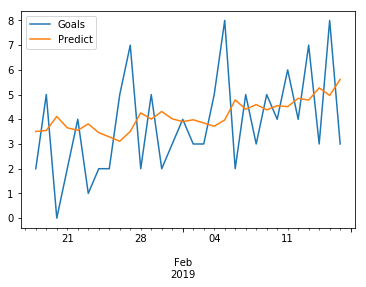

In [3]:
fit1 = Holt(data['Goals']).fit()
data['Predict']=fit1.fittedvalues
data.plot()
#Holtin malli ennustaa isompaa maalimäärää kuin edellisessä ennusteessa.

In [4]:
sqrt(mean_squared_error(data['Goals'], data['Predict']))
#Keskihajonta on yhä alhainen ja lähellä edellisen tasoa (1,974)

2.0342716048715754

In [5]:
mean_absolute_error(data['Goals'], data['Predict'])
#Edellisessä ennusteessa 1,6, joten suuria eroavaisuuksia ei löydy lukujen valossa

1.7516864782451924

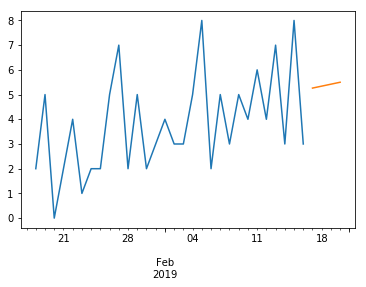

In [6]:
index=pd.date_range('2019-02-17', periods=30, freq='D')
datap=pd.DataFrame(fit1.forecast(4), index=index)
datap.columns=['Predict']
data['Goals'].plot()
datap['Predict'].plot()
#Holtin malli huomioi trendin ja ennuste näyttää maalimäärien kasvavan mitä pidemmälle mennään. 

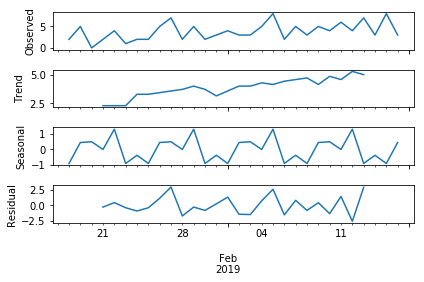

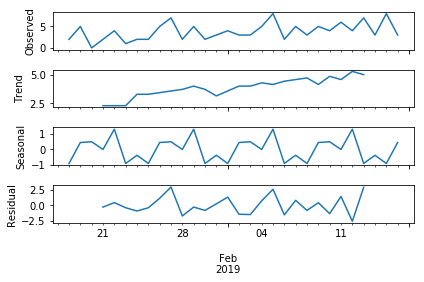

In [7]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Goals']).plot()
#Trendi on selkeästi kasvava

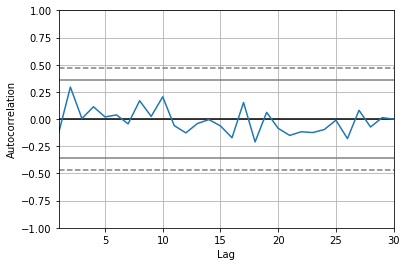

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Goals'])
#Kuviosta näemme ettei kausivaihtelu ylitä koskaan merkittävän korrelaation (katkoviivojen) rajoja. 